In [276]:
# 📦 Librerías estándar
import os

# 📊 Visualización
import matplotlib.pyplot as plt
import seaborn as sns

# 🧪 Scikit-learn
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import (accuracy_score,
    auc,
    classification_report,
    ConfusionMatrixDisplay,
    confusion_matrix,
    f1_score,
    mean_squared_error,
    precision_score,
    recall_score,
    roc_curve,
    RocCurveDisplay,
    r2_score,
)
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.multiclass import OneVsRestClassifier
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import label_binarize, OneHotEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor

# 💾 Guardado de modelos
import joblib

# 🔗 Google Colab
from google.colab import drive
drive.mount('/content/drive')

# 📐 Numpy y Pandas
import numpy as np
import pandas as pd

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Eda Carga y Exploración Inicial de Datos

In [277]:
path = '/content/drive/MyDrive/Colab Notebooks/ml/core ml/BBDD_EXAMEN/insurance.csv'
df = pd.read_csv(path)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [278]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


In [279]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [280]:
(df == '?').sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


In [281]:
df.isna().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


In [282]:
df.duplicated().sum()

np.int64(1)

In [283]:
# no hay duplicados solo son registros identicos
df[df.duplicated()]

,age,sex,bmi,children,smoker,region,charges
581,19,male,30.59,0,no,northwest,1639.5631


In [284]:
df = df.drop_duplicates()

In [285]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [286]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

# Preprocesamiento y entrenamiento de 3 modelos de regression


In [287]:
X = df.drop(columns=['charges'])
y = df['charges']

In [288]:
num_cols = ['age','bmi', 'children']
num_cat = ['sex','smoker','region']

In [289]:
# Split.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# KNN  KNeighborsClassifier

In [290]:
# ColumnTransformer
preprocessor_knn = ColumnTransformer([
    ("num", StandardScaler(), num_cols),
    ("ord", OneHotEncoder(), num_cat)
])

In [291]:
# Modelo.
pipeline_knn = Pipeline([
    ("preprocessing", preprocessor_knn),
    ("model", KNeighborsRegressor(n_neighbors=30))
])

In [292]:
# Entrenamiento.
pipeline_knn.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['age', 'bmi', 'children']),
                                                 ('ord', OneHotEncoder(),
                                                  ['sex', 'smoker',
                                                   'region'])])),
                ('model', KNeighborsRegressor(n_neighbors=30))])

In [293]:
# Prediccion.
y_pred_knn = pipeline_knn.predict(X_test)

# LogisticRegression

In [294]:
# ColumnTransformer
preprocessor_Regresión = ColumnTransformer([
    ("num", StandardScaler(), num_cols),
    ("ord", OneHotEncoder(), num_cat)
])

In [295]:
# Pipeline con logistic regression.
pipeline_line_Regresion = Pipeline([
    ('preprocessor', preprocessor_Regresión),
    ('regressor', LinearRegression())
])

In [296]:
# Entrenar.
pipeline_line_Regresion.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['age', 'bmi', 'children']),
                                                 ('ord', OneHotEncoder(),
                                                  ['sex', 'smoker',
                                                   'region'])])),
                ('regressor', LinearRegression())])

In [297]:
# Prediccion.
y_pred_line_Regresion = pipeline_line_Regresion.predict(X_test)

# RandomForestClassifier

In [298]:
# ColumnTransformer
pipeline_forest_regressor = ColumnTransformer([
    ("num", "passthrough", num_cols),
    ("ord", OneHotEncoder(), num_cat)
])

In [299]:
# Pipeline con RandomForest
pipeline_forest_regressor = Pipeline(steps=[
    ("preprocessing", pipeline_forest_regressor),
    ("regressor", RandomForestRegressor())
])

In [300]:
pipeline_forest_regressor.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num', 'passthrough',
                                                  ['age', 'bmi', 'children']),
                                                 ('ord', OneHotEncoder(),
                                                  ['sex', 'smoker',
                                                   'region'])])),
                ('regressor', RandomForestRegressor())])

In [301]:
# Prediccion.
y_pred_forest_regressor = pipeline_forest_regressor.predict(X_test)

# Resultados los 3 modelos y métricas
1. KNN Classifier :  0.64
2. Logistic Regression : 0.65
3. Random Forest Classifier :0.62

In [302]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score  # <-- Este es el que faltaba
import matplotlib.pyplot as plt

# Validación cruzada para KNN Regressor
print("KNN Regressor")
knn_cv_scores = cross_val_score(pipeline_knn, X_train, y_train, cv=5, scoring='r2')
print("CV R2 Score promedio:", round(knn_cv_scores.mean(), 2))
print("CV R2 Score desviación estándar:", round(knn_cv_scores.std(), 2))
print("Test R2 Score:", round(r2_score(y_test, y_pred_knn), 2))
print("Test MSE:", round(mean_squared_error(y_test, y_pred_knn), 2))
print()

# Validación cruzada para Regresión Lineal
print("Regresión Lineal")
linear_cv_scores = cross_val_score(pipeline_line_Regresion, X_train, y_train, cv=5, scoring='r2')
print("CV R2 Score promedio:", round(linear_cv_scores.mean(), 2))
print("CV R2 Score desviación estándar:", round(linear_cv_scores.std(), 2))
print("Test R2 Score:", round(r2_score(y_test, y_pred_line_Regresion), 2))
print("Test MSE:", round(mean_squared_error(y_test, y_pred_line_Regresion), 2))
print()

# Validación cruzada para Random Forest Regressor
print("Random Forest Regressor")
forest_cv_scores = cross_val_score(pipeline_forest_regressor, X_train, y_train, cv=5, scoring='r2')
print("CV R2 Score promedio:", round(forest_cv_scores.mean(), 2))
print("CV R2 Score desviación estándar:", round(forest_cv_scores.std(), 2))
print("Test R2 Score:", round(r2_score(y_test, y_pred_forest_regressor), 2))
print("Test MSE:", round(mean_squared_error(y_test, y_pred_forest_regressor), 2))
print()

KNN Regressor
CV R2 Score promedio: 0.63
CV R2 Score desviación estándar: 0.03
Test R2 Score: 0.65
Test MSE: 64617723.26

Regresión Lineal
CV R2 Score promedio: 0.73
CV R2 Score desviación estándar: 0.03
Test R2 Score: 0.81
Test MSE: 35478020.68

Random Forest Regressor
CV R2 Score promedio: 0.82
CV R2 Score desviación estándar: 0.01
Test R2 Score: 0.88
Test MSE: 22266469.64



# Optimización de Hiperparámetros

In [303]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import numpy as np

**KNN  KNeighborsClassifier GridSearchCV**

In [304]:
# ColumnTransformer
preprocessor_knn = ColumnTransformer([
    ("num", StandardScaler(), num_cols),
    ("ord", OneHotEncoder(), num_cat)
])
knn_pipeline = Pipeline([
    ("pp", preprocessor_knn),
    ("modelo", KNeighborsRegressor())
])
knn_params = {
    "modelo__n_neighbors": [2, 3, 5, 10,20,30,40] # El nombre debe coincidir con el nombre del modelo.
}

knn_grid = GridSearchCV(knn_pipeline, knn_params, cv=5, scoring="r2", n_jobs=-1)
knn_grid.fit(X_train, y_train)



GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('pp',
                                        ColumnTransformer(transformers=[('num',
                                                                         StandardScaler(),
                                                                         ['age',
                                                                          'bmi',
                                                                          'children']),
                                                                        ('ord',
                                                                         OneHotEncoder(),
                                                                         ['sex',
                                                                          'smoker',
                                                                          'region'])])),
                                       ('modelo', KNeighborsRegressor())]),
             n_jobs=-1,
             param_grid={'modelo__n_neighbors': [2, 3, 5, 10, 20, 30, 40]},
             scoring='r2')

In [305]:
# Evaluación.
knn_best = knn_grid.best_estimator_
y_pred_knn = knn_best.predict(X_test)
print("KNN Regressor")
print("Mejores parámetros:", knn_grid.best_params_)


KNN Regressor
Mejores parámetros: {'modelo__n_neighbors': 5}


In [306]:
# Modelo.
pipeline_knn = Pipeline([
    ("preprocessing", preprocessor_knn),
    ("model", KNeighborsRegressor(n_neighbors=5))
])
# Entrenamiento.
pipeline_knn.fit(X_train, y_train)
y_pred_knn_GridSearchCV = knn_grid.predict(X_test)

# Mostrar resultados correctos desde el objeto GridSearchCV
print("Mejores parámetros GridSearchCV:", knn_grid.best_params_)
print("Mejor R2 Score CV:", knn_grid.best_score_)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['age', 'bmi', 'children']),
                                                 ('ord', OneHotEncoder(),
                                                  ['sex', 'smoker',
                                                   'region'])])),
                ('model', KNeighborsRegressor())])

**KNN KNeighborsClassifier RandomizedSearchCV**

In [308]:
from scipy.stats import randint
# ColumnTransformer
preprocessor_knn = ColumnTransformer([
    ("num", StandardScaler(), num_cols),
    ("ord", OneHotEncoder(), num_cat)
])
knn_pipeline = Pipeline([
    ("pp", preprocessor_knn),
    ("modelo", KNeighborsRegressor())
])
# Definimos el espacio de parámetros para la búsqueda aleatoria
forest_params_rand = {
    'regressor__n_estimators': randint(50, 200),
    'regressor__max_depth': [None, 5, 10],
    'regressor__min_samples_split': randint(2, 11)
}

# Configuramos RandomizedSearchCV
forest_random = RandomizedSearchCV(
    pipeline_forest_regressor,
    param_distributions=forest_params_rand,
    n_iter=10,               # Número de combinaciones aleatorias a probar
    cv=3,
    scoring='r2',
    random_state=42,
    n_jobs=-1
)

# Entrenamos
forest_random.fit(X_train, y_train)

# Resultados
print("Mejores parámetros RandomizedSearchCV:", forest_random.best_params_)
print("Mejor R2 Score CV:", forest_random.best_score_)

Mejores parámetros RandomizedSearchCV: {'regressor__max_depth': 5, 'regressor__min_samples_split': 10, 'regressor__n_estimators': 98}
Mejor R2 Score CV: 0.8444276828226503


**Random Forest Regressor GridSearchCV**

In [321]:
# ColumnTransformer
pipeline_forest_regressor = ColumnTransformer([
    ("num", "passthrough", num_cols),
    ("ord", OneHotEncoder(), num_cat)
])

# Pipeline con RandomForest
pipeline_forest_regressor = Pipeline(steps=[
    ("preprocessing", pipeline_forest_regressor),
    ("regressor", RandomForestRegressor())
])
forest_params = {
    'regressor__n_estimators': [50, 100, 200],
    'regressor__max_depth': [None, 5, 10],
    'regressor__min_samples_split': [2, 5, 10]
}

forest_grid = GridSearchCV(pipeline_forest_regressor, forest_params, cv=3, scoring="r2")
forest_grid.fit(X_train, y_train)# Evaluación.
forest_best = forest_grid.best_estimator_
y_pred_forest_GridSearchCV = forest_best.predict(X_test)

print("Forest Regressor")
print("Mejores parámetros:", forest_grid.best_params_)
print("R²:", r2_score(y_test, y_pred_forest_GridSearchCV))

Forest Regressor
Mejores parámetros: {'regressor__max_depth': 5, 'regressor__min_samples_split': 5, 'regressor__n_estimators': 200}
R²: 0.8999183402913918


**Random Forest Regressor RandomizedSearchCV**

In [275]:
# Paso 1: Preprocesamiento
preprocessor = ColumnTransformer([
    ("num", "passthrough", num_cols),
    ("ord", OneHotEncoder(), num_cat)
])

# Paso 2: Pipeline completo con RandomForest
pipeline_forest_regressor = Pipeline(steps=[
    ("preprocessing", preprocessor),
    ("regressor", RandomForestRegressor())
])

# Paso 3: Definir el espacio de búsqueda aleatoria
param_dist = {
    'regressor__n_estimators': randint(50, 200),
    'regressor__max_depth': [None, 5, 10],
    'regressor__min_samples_split': randint(2, 11)
}

# Paso 4: RandomizedSearchCV
forest_random_Regressor = RandomizedSearchCV(
    pipeline_forest_regressor,
    param_distributions=param_dist,
    n_iter=10,
    cv=3,
    scoring='r2',
    random_state=42,
    n_jobs=-1
)

# Paso 5: Entrenar
forest_random_Regressor.fit(X_train, y_train)

# Paso 6: Mostrar mejores resultados
print("Mejores parámetros RandomizedSearchCV:", forest_random_Regressor.best_params_)
print("Mejor R2 Score CV:", forest_random_Regressor.best_score_)

Mejores parámetros RandomizedSearchCV: {'regressor__max_depth': 5, 'regressor__min_samples_split': 9, 'regressor__n_estimators': 87}
Mejor R2 Score CV: 0.8433110222780443


# Evaluación de Modelos

* KNN  KNeighborsClassifier GridSearchCV =  0.72
* KNN KNeighborsClassifier RandomizedSearchCV = 0.84
* Random Forest Regressor GridSearchCV = 0.90
* Random Forest Regressor RandomizedSearchCV = 0.84

In [314]:
print("R2  KNN  KNeighborsClassifier GridSearchCV:",  knn_grid.best_score_)
print("R2  KNN KNeighborsClassifier RandomizedSearchCV:", forest_random.best_score_)
print("R2  Random Forest Regressor GridSearchCV :", r2_score(y_test, y_pred_forest_GridSearchCV))
print("R2  Random Forest Regressor RandomizedSearchCV:", forest_random_Regressor.best_score_)

R2  KNN  KNeighborsClassifier GridSearchCV: 0.7200145807294906
R2  KNN KNeighborsClassifier RandomizedSearchCV: 0.8444276828226503
R2  Random Forest Regressor GridSearchCV : 0.9013074135698864
R2  Random Forest Regressor RandomizedSearchCV: 0.8433110222780443


# Evaluación de Modelos

In [315]:
# Definir etiquetas (puedes cambiarlas según tu dominio del problema)
labels = [0, 1, 2]
bins = [0, 10000, 25000, y_test.max()]  # ajusta si es necesario

# Discretizar
y_test_class = pd.cut(y_test, bins=bins, labels=labels).astype(int)
y_pred_knn_grid_class = pd.cut(knn_grid.predict(X_test), bins=bins, labels=labels).astype(int)
y_pred_knn_random_class = pd.cut(knn_grid.predict(X_test), bins=bins, labels=labels).astype(int)
y_pred_forest_grid_class = pd.cut(forest_grid.predict(X_test), bins=bins, labels=labels).astype(int)
y_pred_forest_random_class = pd.cut(forest_random_Regressor.predict(X_test), bins=bins, labels=labels).astype(int)

📊 Matriz de Confusión: KNN GridSearchCV


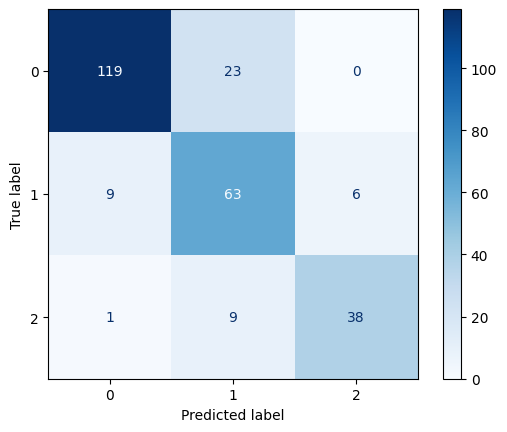

📊 Matriz de Confusión: KNN RandomizedSearchCV


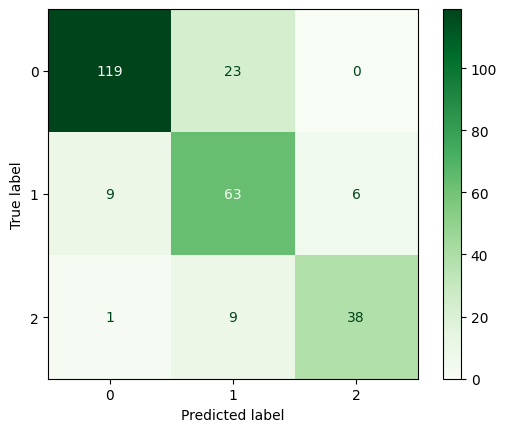

📊 Matriz de Confusión: RF GridSearchCV


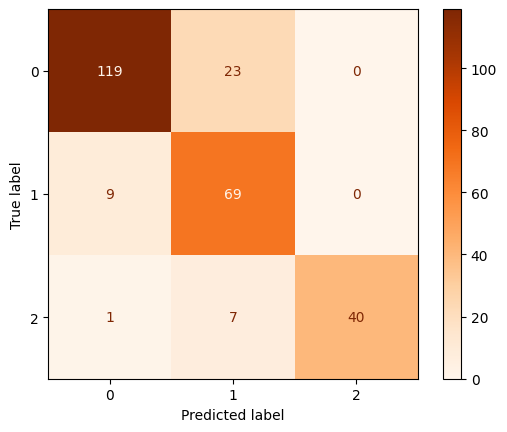

📊 Matriz de Confusión: RF RandomizedSearchCV


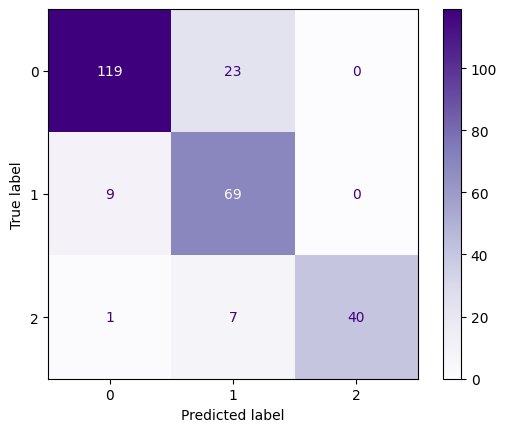

In [317]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Matriz de confusión para KNN GridSearchCV
print("📊 Matriz de Confusión: KNN GridSearchCV")
cm_knn_grid = confusion_matrix(y_test_class, y_pred_knn_grid_class)
disp_knn_grid = ConfusionMatrixDisplay(confusion_matrix=cm_knn_grid)
disp_knn_grid.plot(cmap="Blues")
plt.show()

# Matriz de confusión para KNN RandomizedSearchCV
print("📊 Matriz de Confusión: KNN RandomizedSearchCV")
cm_knn_random = confusion_matrix(y_test_class, y_pred_knn_random_class)
disp_knn_random = ConfusionMatrixDisplay(confusion_matrix=cm_knn_random)
disp_knn_random.plot(cmap="Greens")
plt.show()

# Matriz de confusión para Random Forest GridSearchCV
print("📊 Matriz de Confusión: RF GridSearchCV")
cm_rf_grid = confusion_matrix(y_test_class, y_pred_forest_grid_class)
disp_rf_grid = ConfusionMatrixDisplay(confusion_matrix=cm_rf_grid)
disp_rf_grid.plot(cmap="Oranges")
plt.show()

# Matriz de confusión para Random Forest RandomizedSearchCV
print("📊 Matriz de Confusión: RF RandomizedSearchCV")
cm_rf_random = confusion_matrix(y_test_class, y_pred_forest_random_class)
disp_rf_random = ConfusionMatrixDisplay(confusion_matrix=cm_rf_random)
disp_rf_random.plot(cmap="Purples")
plt.show()


# Conclusion

* No se genera la curva ROC ayq ue es para clasificacion no para regresion
* Random Forest Regressor R2: 0.82  fue el mejor modelo
* R2  Random Forest Regressor con GridSearchCV : 0.90 fue el mejor modelo con hiperparametro


